<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


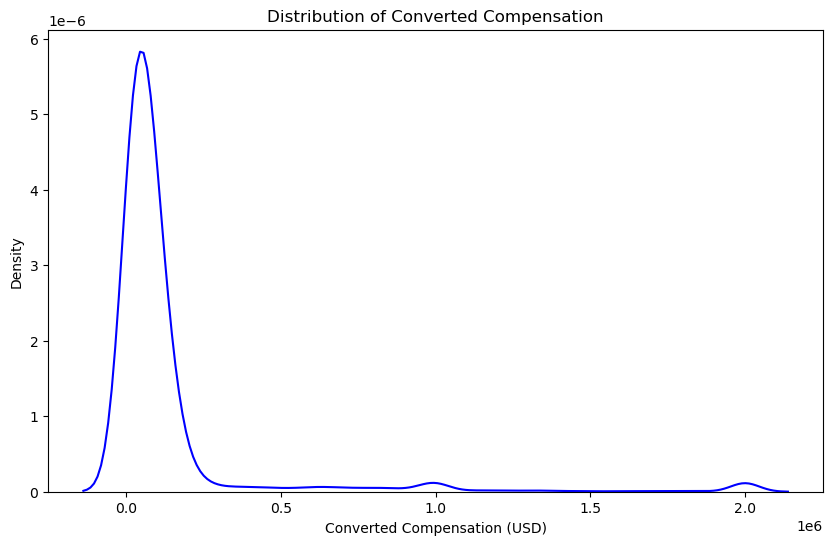

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'], color='blue')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


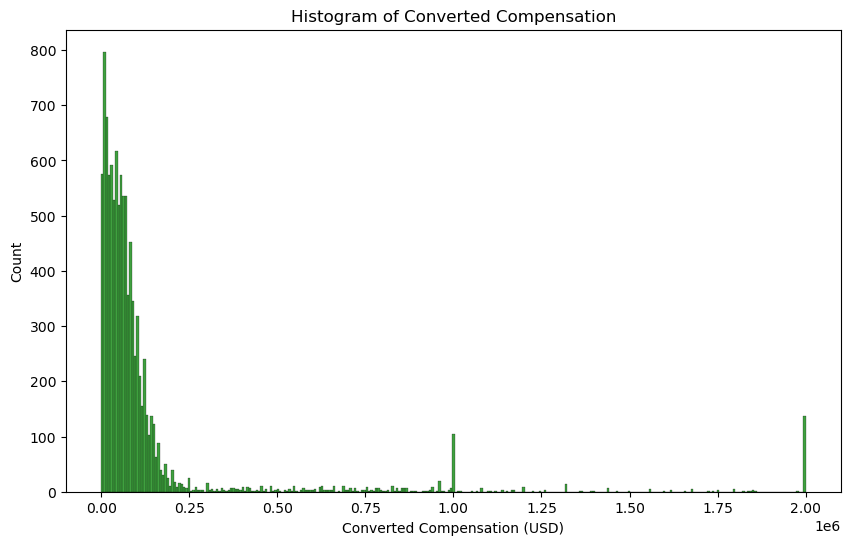

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], color='green')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Count')
plt.show()

What is the median of the column `ConvertedComp`?


In [16]:
median_converted_comp = df['ConvertedComp'].median()

print(f'The median of the ConvertedComp column is: {median_converted_comp}')

The median of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [17]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [18]:
# Count the number of responders for each gender
gender_counts = df['Gender'].value_counts()

# Display the count of responders who identified as 'Man'
man_count = gender_counts.get('Man', 0)
print(f'The number of responders who identified themselves as Man is: {man_count}')

The number of responders who identified themselves as Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?

In [21]:
# Filter the DataFrame to include only rows where the 'Gender' is 'Woman'
woman_details = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for responders who identified as 'Woman'
median_woman_comp = woman_details['ConvertedComp'].median()

print(f'The median ConvertedComp for responders identified only as a Woman is: {median_woman_comp}')

The median ConvertedComp for responders identified only as a Woman is: 57708.0


In [22]:
# Filter the DataFrame to include only rows where the 'Gender' is 'Man'
man_details = df[df['Gender'] == 'Man']

# Calculate the median ConvertedComp for responders who identified as 'Man'
median_man_comp = man_details['ConvertedComp'].median()

print(f'The median ConvertedComp for responders identified only as a man is: {median_man_comp}')

The median ConvertedComp for responders identified only as a man is: 57744.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [23]:
age_summary = df['Age'].describe()

print("Five-number summary for the 'Age' column:")
print(age_summary[['min', '25%', '50%', '75%', 'max']])

Five-number summary for the 'Age' column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


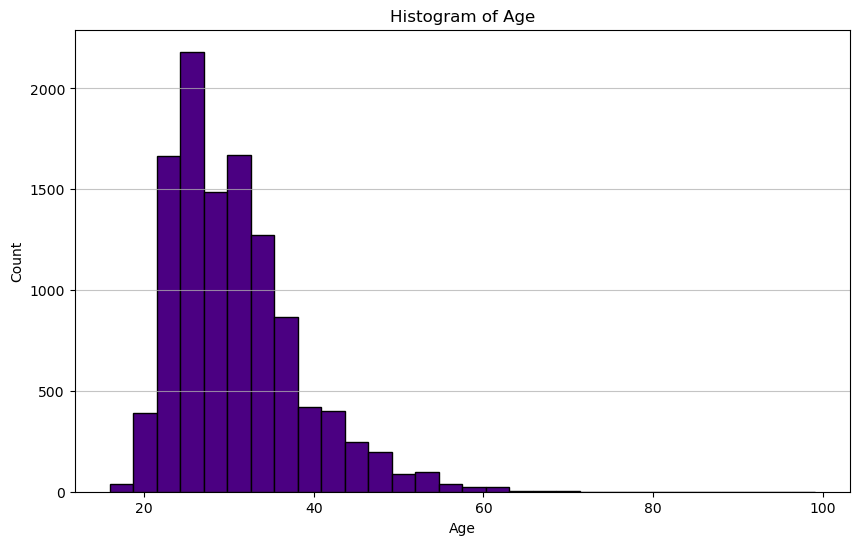

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='indigo', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


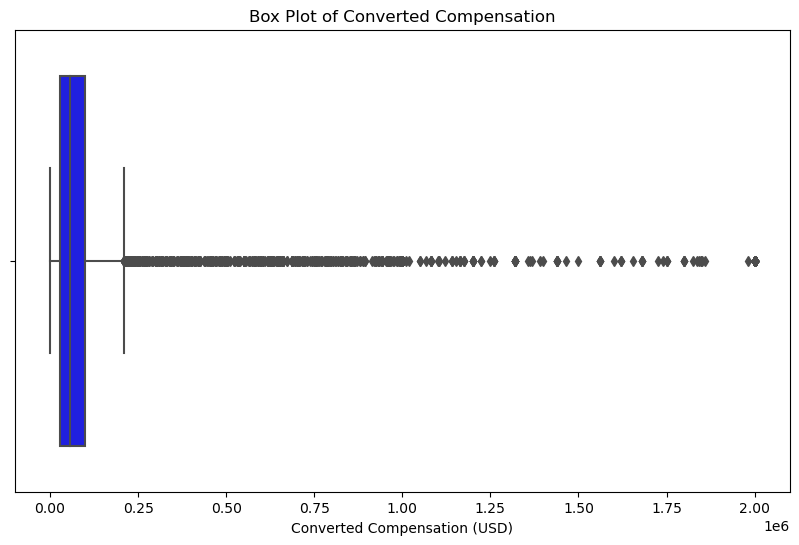

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'], color='blue')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [37]:
converted_comp = df['ConvertedComp']

# Calculate Q1 and Q3
Q1 = converted_comp.quantile(0.25)
Q3 = converted_comp.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print(f'The Interquartile Range (IQR) for the ConvertedComp column is: {IQR}')

The Interquartile Range (IQR) for the ConvertedComp column is: 73132.0


Find out the upper and lower bounds.


In [38]:
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'The lower bound for potential outliers is: {lower_bound}')
print(f'The upper bound for potential outliers is: {upper_bound}')


The lower bound for potential outliers is: -82830.0
The upper bound for potential outliers is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [39]:
# Identify outliers using boolean indexing
outliers = (converted_comp < lower_bound) | (converted_comp > upper_bound)

# Count the number of outliers
num_outliers = outliers.sum()

print(f'The number of outliers in the ConvertedComp column is: {num_outliers}')

The number of outliers in the ConvertedComp column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [40]:
# Create a new DataFrame by removing outliers
df_no_outliers = df[(converted_comp >= lower_bound) & (converted_comp <= upper_bound)]

# Display the new DataFrame without outliers
print(df_no_outliers)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

In [44]:
# Calculate the median of 'ConvertedComp' after removing outliers
median_no_outliers = df_no_outliers['ConvertedComp'].median()

print(f'The median ConvertedComp after removing outliers is: {median_no_outliers}')

The median ConvertedComp after removing outliers is: 52704.0


In [45]:
# Calculate the mean of 'ConvertedComp' after removing outliers
mean_no_outliers = df_no_outliers['ConvertedComp'].mean()

print(f'The mean ConvertedComp after removing outliers is: {mean_no_outliers}')

The mean ConvertedComp after removing outliers is: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [41]:
# Select all numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Display the correlation between 'Age' and all other numerical columns
correlation_with_age = correlation_matrix['Age'].sort_values(ascending=False)

print("Correlation with Age:")
print(correlation_with_age)


Correlation with Age:
Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
